# Introduction

This notebook takes the raw downloaded weather forecast data and turns it into a clean dataset with a complete date range and missing values filled.

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

# Data import

In [2]:
path = 'data/Weather forecast/Historical to 2022-08-29/WeatherWorldOnline forecast data to 29 Aug.gz'
raw_data = pd.read_csv(path)

In [3]:
raw_data

,datetime,location,tempC,windspeedKmph,winddirDegree,winddir16Point,precipMM,humidity,visibility,pressure,cloudcover,HeatIndexC,DewPointC,WindChillC,WindGustKmph,FeelsLikeC,uvIndex
0,2013-01-01 00:00:00,Montpellier,11,19,139,SE,0.1,80,2,1017,84,11,8,9,31,9,1
1,2013-01-01 01:00:00,Montpellier,11,18,135,SE,0.1,81,2,1017,89,11,8,9,29,9,1
2,2013-01-01 02:00:00,Montpellier,11,17,131,SE,0.1,82,2,1016,95,11,8,9,27,9,1
3,2013-01-01 03:00:00,Montpellier,11,15,127,SE,0.2,83,2,1016,100,11,8,9,24,9,1
4,2013-01-01 04:00:00,Montpellier,11,13,107,ESE,0.1,83,2,1016,94,11,8,9,20,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169339,2022-08-29 19:00:00,Marseille,27,19,137,SE,0.0,64,10,1014,7,29,20,27,24,29,1
169340,2022-08-29 20:00:00,Marseille,27,17,136,SE,0.0,65,10,1014,6,28,19,27,22,28,1
169341,2022-08-29 21:00:00,Marseille,26,15,136,SE,0.0,65,10,1014,5,28,19,26,21,28,1
169342,2022-08-29 22:00:00,Marseille,26,15,128,SE,0.0,66,10,1015,6,27,19,26,21,27,1


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169344 entries, 0 to 169343
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   datetime        169344 non-null  object 
 1   location        169344 non-null  object 
 2   tempC           169344 non-null  int64  
 3   windspeedKmph   169344 non-null  int64  
 4   winddirDegree   169344 non-null  int64  
 5   winddir16Point  169344 non-null  object 
 6   precipMM        169344 non-null  float64
 7   humidity        169344 non-null  int64  
 8   visibility      169344 non-null  int64  
 9   pressure        169344 non-null  int64  
 10  cloudcover      169344 non-null  int64  
 11  HeatIndexC      169344 non-null  int64  
 12  DewPointC       169344 non-null  int64  
 13  WindChillC      169344 non-null  int64  
 14  WindGustKmph    169344 non-null  int64  
 15  FeelsLikeC      169344 non-null  int64  
 16  uvIndex         169344 non-null  int64  
dtypes: float64

In [5]:
raw_data.describe(include = 'all')

,datetime,location,tempC,windspeedKmph,winddirDegree,winddir16Point,precipMM,humidity,visibility,pressure,cloudcover,HeatIndexC,DewPointC,WindChillC,WindGustKmph,FeelsLikeC,uvIndex
count,169344,169344,169344.000000,169344.000000,169344.000000,169344,169344.00000,169344.000000,169344.000000,169344.000000,169344.000000,169344.000000,169344.000000,169344.000000,169344.000000,169344.000000,169344.000000
unique,84672,2,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2013-01-01 00:00:00,Montpellier,NaN,NaN,NaN,NW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,84672,NaN,NaN,NaN,30417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.308656,17.193069,214.856428,NaN,0.08805,66.913720,9.699747,1016.591400,25.042293,16.780240,9.889037,15.298912,25.404969,15.635925,2.876512
std,NaN,NaN,6.404664,10.496253,103.982433,NaN,0.44155,12.715908,1.076757,6.936724,28.374646,6.959451,5.902616,7.552143,15.005452,8.002088,2.146968
min,NaN,NaN,-3.000000,0.000000,0.000000,NaN,0.00000,22.000000,0.000000,983.000000,0.000000,-3.000000,-12.000000,-11.000000,0.000000,-11.000000,1.000000
25%,NaN,NaN,11.000000,9.000000,124.000000,NaN,0.00000,58.000000,10.000000,1013.000000,4.000000,11.000000,6.000000,10.000000,14.000000,10.000000,1.000000
50%,NaN,NaN,16.000000,15.000000,237.000000,NaN,0.00000,67.000000,10.000000,1017.000000,12.000000,16.000000,10.000000,16.000000,23.000000,16.000000,1.000000
75%,NaN,NaN,21.000000,23.000000,312.000000,NaN,0.00000,76.000000,10.000000,1020.000000,39.000000,23.000000,14.000000,21.000000,35.000000,21.000000,5.000000


# Data selection

We drop the columns:
- `ẁinddir16Point` as we will use `winddirDegree` instead. We could use `windDirDegree` and convert to numeric using one-hot encoding, but that would greatly increase the training times for probably little benefit.
- `HeatIndexC` as it is a combination of air temperature and humidity [[1]](https://www.weather.gov/ama/heatindex) which we already have.
- `FeelsLikeC` as it is another combined element.
- `uvIndex` because it is not available on an hourly basis in the future forecast data.

In [6]:
data_df = raw_data.drop(columns = ['winddir16Point', 'HeatIndexC', 'FeelsLikeC', 'uvIndex'])

We'll use a consistent name and type for the Datetime column for all data.

In [7]:
data_df.rename(columns = {'datetime' : 'Datetime'}, inplace = True)
data_df['Datetime'] = pd.to_datetime(data_df['Datetime'])

We can drop the first day as we don't have it for the air quality data

In [8]:
data_df.drop(data_df[data_df['Datetime'] < pd.to_datetime('2013-01-02 00:00:00')].index, inplace = True)

## Duplicates

Confirm we have no dupes...

In [9]:
data_df.duplicated().any()

False

## Feature selection

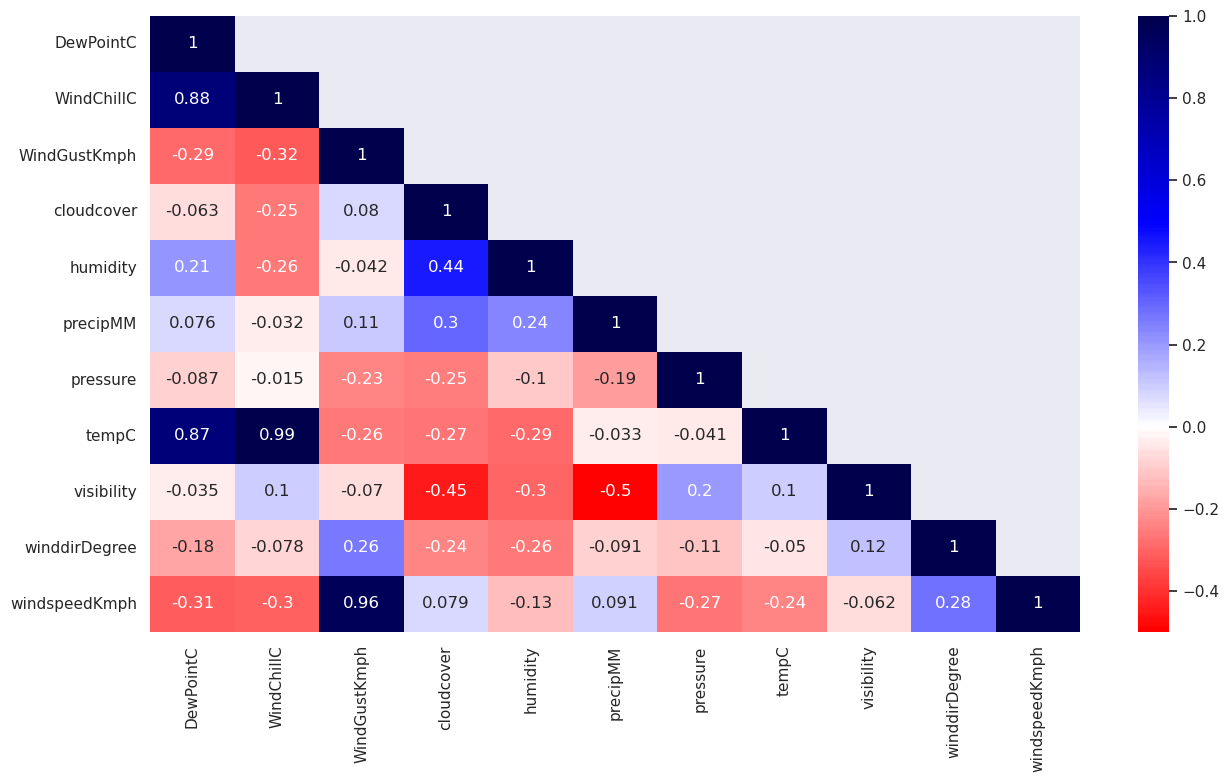

In [10]:
corr_data_df = data_df.pivot_table(
    index = ['location', 'Datetime']
)

sns.set(rc = {'figure.figsize':(15,8)})
correlations = corr_data_df.corr()
mask = np.triu(correlations)
np.fill_diagonal(mask, 0)
heatmap = sns.heatmap(
    correlations,
    cmap = plt.cm.seismic_r,
    annot=True,
    center = 0,
    mask=mask,
)
plt.show()

We drop `WindChillC` and `WindGustKmph` as they are highly correlated with `tempC` and `windspeedKmph` resepectively.

In [11]:
data_df.drop(columns = ['WindChillC', 'WindGustKmph'], inplace = True)

## Time coverage

Let's check we have complete data for the date range.

In [12]:
# Create a complete datetime range
datetime_range = pd.date_range(start = '2013-01-02', end = '2022-08-29 23:59:59', freq = 'H')

# Create a new empty dataframe with our complete date range
datetime_df = pd.DataFrame(index = datetime_range)
datetime_df.index.name = 'Datetime'

In [13]:
check_date_coverage_pt = datetime_df.merge(
    data_df,
    how = 'left',
    left_index = True,
    right_on = 'Datetime'
)

In [14]:
check_date_coverage_pt

,Datetime,location,tempC,windspeedKmph,winddirDegree,precipMM,humidity,visibility,pressure,cloudcover,DewPointC
24,2013-01-02 00:00:00,Montpellier,8,29,305,0.0,78,10,1019,11,5
84696,2013-01-02 00:00:00,Marseille,8,20,314,0.0,85,10,1017,18,5
25,2013-01-02 01:00:00,Montpellier,8,27,310,0.0,77,10,1020,11,4
84697,2013-01-02 01:00:00,Marseille,7,23,317,0.0,86,10,1017,22,5
26,2013-01-02 02:00:00,Montpellier,8,26,316,0.0,76,10,1020,11,4
...,...,...,...,...,...,...,...,...,...,...,...
169341,2022-08-29 21:00:00,Marseille,26,15,136,0.0,65,10,1014,5,19
84670,2022-08-29 22:00:00,Montpellier,24,13,97,0.0,82,10,1014,8,21
169342,2022-08-29 22:00:00,Marseille,26,15,128,0.0,66,10,1015,6,19
84671,2022-08-29 23:00:00,Montpellier,23,14,90,0.0,83,10,1014,8,20


In [15]:
print("Missing rows")
check_date_coverage_pt[check_date_coverage_pt['location'].isna()]

Missing rows


,Datetime,location,tempC,windspeedKmph,winddirDegree,precipMM,humidity,visibility,pressure,cloudcover,DewPointC


All in order date-wise then.

# Null / invalid values

First we check for nulls.

In [16]:
data_df.isna().any()

Datetime         False
location         False
tempC            False
windspeedKmph    False
winddirDegree    False
precipMM         False
humidity         False
visibility       False
pressure         False
cloudcover       False
DewPointC        False
dtype: bool

Looks good. Now let's check for any unusual values...

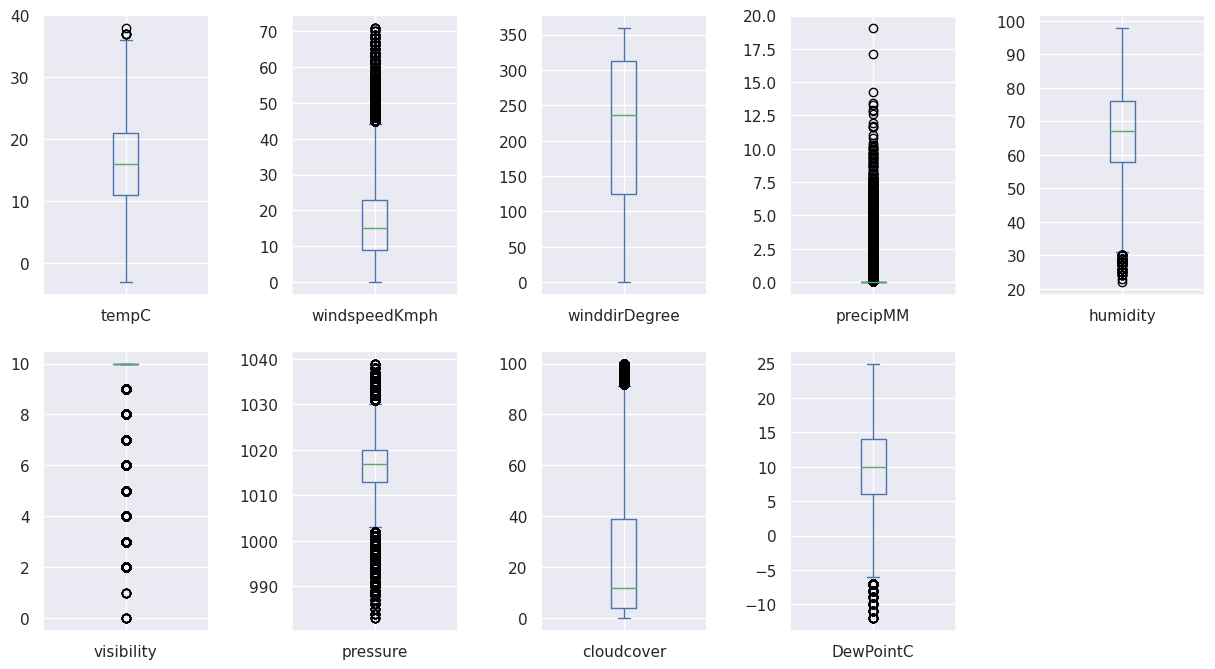

In [17]:
data_df.plot(
    kind = 'box', 
    subplots = True, 
    sharey = False, 
    figsize = (15, 8),
    layout = (2, 5)
)

plt.subplots_adjust(wspace=0.5) 
plt.show()

These all seem to make sense

In [18]:
final_data = data_df.pivot_table(
    index = ['location', 'Datetime']
)

# Final data

In [19]:
final_data

DewPointC  cloudcover  humidity  precipMM  \
location    Datetime                                                         
Marseille   2013-01-02 00:00:00          5          18        85       0.0   
            2013-01-02 01:00:00          5          22        86       0.0   
            2013-01-02 02:00:00          5          26        86       0.0   
            2013-01-02 03:00:00          5          30        87       0.0   
            2013-01-02 04:00:00          4          24        86       0.0   
...                                    ...         ...       ...       ...   
Montpellier 2022-08-29 19:00:00         22           6        76       0.0   
            2022-08-29 20:00:00         21           8        79       0.0   
            2022-08-29 21:00:00         21           9        82       0.0   
            2022-08-29 22:00:00         21           8        82       0.0   
            2022-08-29 23:00:00         20           8        83       0.0   

                                 pressure  tempC  visibility  winddirDegree  \
location    Datetime                                                          
Marseille   2013-01-02 00:00:00      1017      8          10            314   
            2013-01-02 01:00:00      1017      7          10            317   
            2013-01-02 02:00:00      1017      7          10            320   
            2013-01-02 03:00:00      1017      7          10            323   
            2013-01-02 04:00:00      1017      6          10            322   
...                                   ...    ...         ...            ...   
Montpellier 2022-08-29 19:00:00      1014     26          10            117   
            2022-08-29 20:00:00      1014     25          10            110   
            2022-08-29 21:00:00      1014     24          10            103   
            2022-08-29 22:00:00      1014     24          10             97   
            2022-08-29 23:00:00      1014     23          10             90   

                                 windspeedKmph  
location    Datetime                            
Marseille   2013-01-02 00:00:00             20  
            2013-01-02 01:00:00             23  
            2013-01-02 02:00:00             27  
            2013-01-02 03:00:00             30  
            2013-01-02 04:00:00             28  
...                                        ...  
Montpellier 2022-08-29 19:00:00             16  
            2022-08-29 20:00:00             14  
            2022-08-29 21:00:00             12  
            2022-08-29 22:00:00             13  
            2022-08-29 23:00:00             14  

[169296 rows x 9 columns]

In [20]:
final_data.to_csv('data/Weather forecast/Historical to 2022-08-29/Cleaned weather forecast data.gz')